In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle'), line 9 ('axes.edgecolor : w')


In [3]:
from abg_python.all_utils import boxcar_average
from abg_python.plot_utils import nameAxes

Couldn't import numba. Missing:
abg_python.all_utils.get_cylindrical_velocities


In [4]:
new_xs,new_ys = boxcar_average(xs,ys,0.2)
noise = np.random.uniform(0,5,size=new_ys.size)
__,new_noise = boxcar_average(xs,noise,0.2)


plt.plot(new_xs,new_ys+new_noise)

NameError: name 'xs' is not defined

In [ ]:
Gmks = 6.67430 ## m3⋅kg−1⋅s−2 # e-11
Gmks *= (2) ## m3 msun^-1 s^-2 # e30
Gmks *= (3600*24) ## m3 msun^-1 day^-2
Gmks /= ((6.957)**3)# e8 e8 8
## -11 + 30 + 24 - 6 - 8 - 11
Gexoplanet = Gmks*1e-5

In [43]:
def trapezoid(x, tc, tau, T, delta):
    #convert variables from paper into trapezoid definition
    t1 = tc - (T + tau)/2 
    t2 = t1 + tau 
    t3 = t1 + T
    t4 = t1 + T + tau 
    
    #handle case when x is a list/array
    try: 
        iter(x)
        return [trapezoid(i, tc, tau, T, delta) for i in x]
    except:
        if x <= t1:
            return 1
        elif t1 < x <= t2: 
            return 1 - (delta/(t2 - t1))*(x - t1)
        elif t2 < x <= t3:
            return 1 - delta
        elif t3 < x <=t4:
            return 1 - delta + (delta/(t4-t3))*(x-t3)
        else:
            return 1
    
def add_planet(
    Mstar, ## solar masses
    Rstar, ## solar radii
    Rp, ## earth radii
    period, ## days
    duration, ## days
    ax=None,
    light_xs=None,
    light_ys=None):
    
    dt = 0.01
    if light_xs is None:
        light_xs = np.arange(0,duration,dt)#*np.random.uniform(0.2,5)
        light_ys = np.ones(light_xs.size)
    
    ## Rstar/a angular size of star
    ## Rstar/a / 2pi is the fraction of the period that is transit
    ## Rstar/a / 2pi * P is the duration of the transit
    ## Kepler's third law a^3/P^2 = GM/4pi^2
    Rp_star = Rp/109.076
    P_over_a = (4*period/(np.pi*Gexoplanet*Mstar))**(1/3)
    tau = Rp_star*P_over_a
    T = P_over_a *(Rstar-Rp_star)
    delta = (Rp_star/Rstar)**2
    
    period=max(2*(T+2*tau),period)
    phase_offset = np.random.uniform(0,period)
    for this_tc in light_xs[int(phase_offset/dt)::int(period/dt)]:
        dip = np.array(trapezoid(light_xs,this_tc,tau,T,delta))
        light_ys*=dip
        

    noise = np.random.uniform(0.8,1,size=light_ys.size)
    light_ys*=noise
    light_xs,light_ys = boxcar_average(light_xs,light_ys,0.3,assign='center')
    light_ys/=np.nanmax(light_ys)
    
    if ax is not None:
        ax.plot(light_xs,light_ys)
        ax.set_ylim(0.5,1.1)
        nameAxes(ax,None,None,None,subtitle='T | tau | delta | period\n'+
                 f'{T:.2f} | {tau:.2f} | {delta:.2f} | {period:.2f}')
    return light_xs,light_ys

xs,ys = add_planet(
    0.3, #mstar
    0.3, #rstar
    10, #rplanet
    5,# period of orbit
    15, ## observation time
    plt.gca())

In [75]:
mstars = [
    1, 
    0.4, 
    1, 
    0.1,
    0.1,
    0.1,
    1,
    0.1,0.1]
rstars = [
    0.5, 
    0.2, 
    0.5,
    0.5,
    0.7,
    0.5,
    1,
    0.5,0.5]
rplanets = [
    15.0, 
    3.0, 
    30.0,
    1.0,
    30.0,
    20.0,
    1,
    20.0,20.0]
periods = [
    5, 
    2, 
    10, 
    10,
    20,
    10,
    10,
    10,10]
observation_time = 30

fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True)
for i,ax in enumerate(axs.flatten()):
    add_planet(
        mstars[i], #mstar
        rstars[i], #rstar
        rplanets[i], #rplanet
        periods[i],# period of orbit
        observation_time,
        ax) ## observation time
fig.set_size_inches(12,12)
fig.set_dpi(120)
fig.set_facecolor('white')

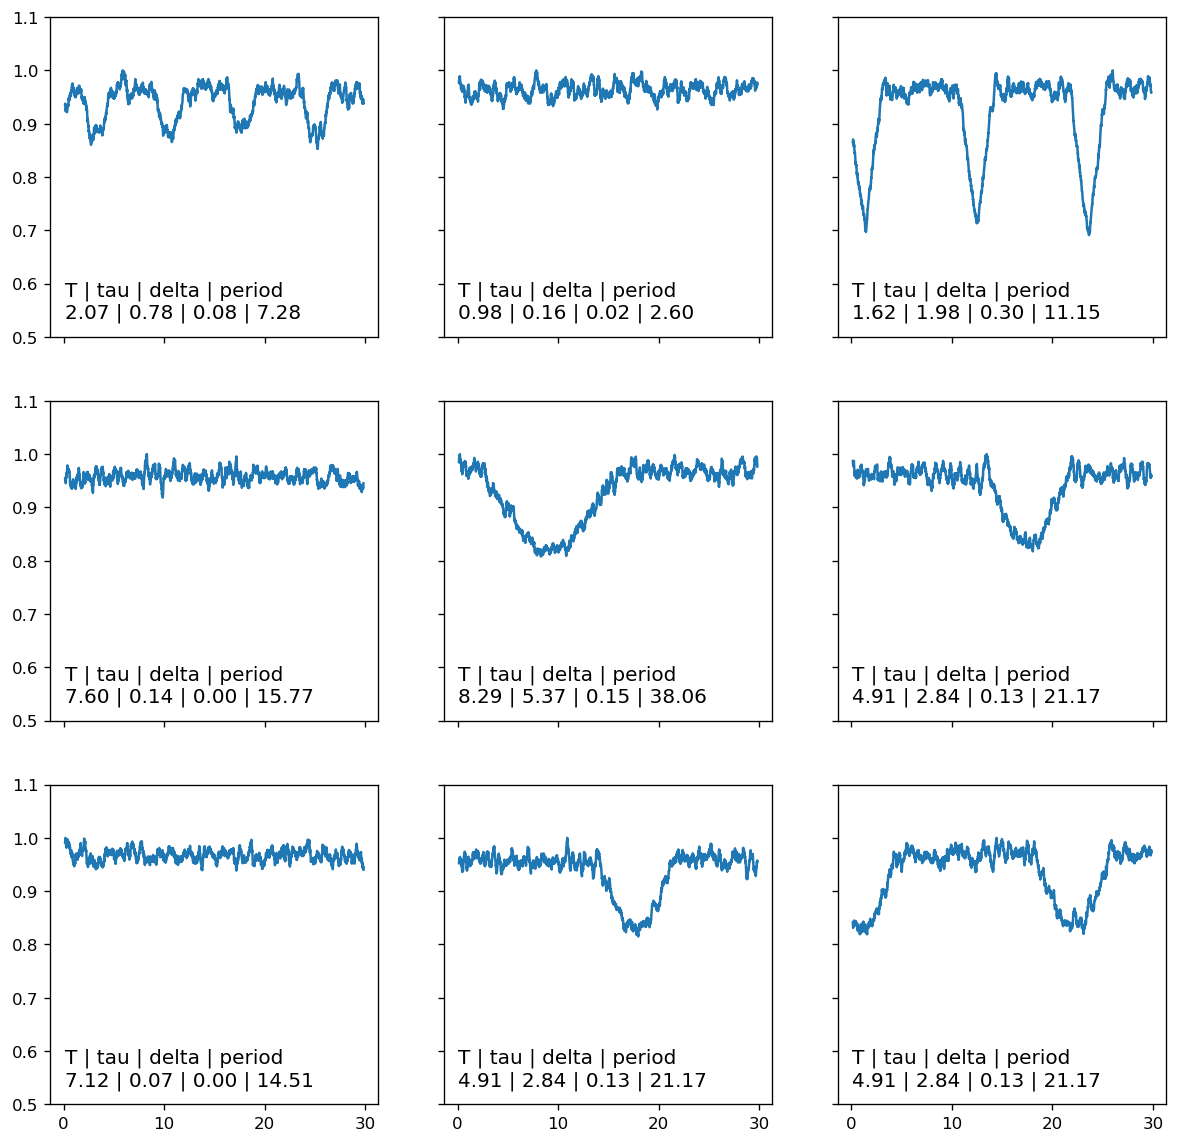

In [76]:
fig

##### 

In [4]:
%matplotlib inline

In [1]:
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

In [164]:
def add_sphere_to_ax(ax,radius,orbital_sep,c='b',offset_angle=0,zorder=10):
    if orbital_sep == 0:
        offset_x=offset_y=0
    else:
        offset_x = np.cos(offset_angle)*(orbital_sep)
        offset_y = np.sin(offset_angle)*(orbital_sep)


    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    """
    x = radius * np.outer(np.cos(u), np.sin(v))+offset_x
    y = radius * np.outer(np.sin(u), np.sin(v))+offset_y
    z = radius*1.25 * np.outer(np.ones(np.size(u)), np.cos(v))
    """
    #ax.plot_surface(x, y, z, color=c,zorder=zorder)

    ax.plot(offset_x,offset_y,0,'.',c=c,markersize=radius,zorder=zorder)
    
    if orbital_sep > 0:
        ax.plot(np.cos(u)*orbital_sep,np.sin(u)*orbital_sep,np.zeros(u.size),c='w',ls='--',zorder=10)

12
4


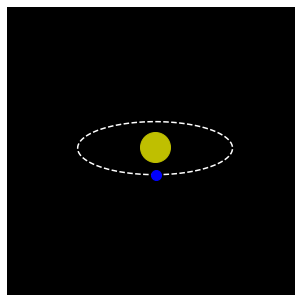

In [178]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

orbital_sep = 300
radius = 20
offset_angle = 0

add_sphere_to_ax(
    ax,
    radius,
    orbital_sep,
    offset_angle=offset_angle,
    zorder=-12 if offset_angle > np.pi/2 and offset_angle < 3*np.pi/2 else 12)
add_sphere_to_ax(ax,3*radius,0,c='y',zorder=4)


# Make data

ax.set_xlim(-orbital_sep*1.15,orbital_sep*1.15)
ax.set_ylim(-orbital_sep*1.15,orbital_sep*1.15)
ax.set_zlim(-orbital_sep*1.15,orbital_sep*1.15)

ax.axis('off')
ax.set_facecolor('k')
fig.subplots_adjust(left=0,right=1,top=1,bottom=0)
axisEqual3D(ax)
for i,angle in enumerate(np.linspace(0,360,1000,endpoint=False)):
    ax.view_init(20, angle)
    fig.savefig('frame_%03d.png'%i)